In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
from matplotlib import colors

Funkcje do zaimplementowania:

In [235]:
#konwerter: nie trzeba implementowaÄ samemu, moĹźna wykorzystaÄ funkcjÄ z bilbioteki
def hsv2rgb(h, s, v):
    #TODO
    # funkcja z biblioteki
    h, s, v = colors.hsv_to_rgb((h, s, v))
    return (h, s, v)



# poniĹźej znajdujÄ
# siÄ funkcje modelujÄ
#ce kolejne gradienty z zadania.
# v to pozycja na osi ox: v jest od 0 do 1. Zewnetrzna funkcja wywoĹuje te metody podajÄ
#c
# rĂłĹźne v i oczekujÄ
#c trĂłjki RGB bÄ
#dĹş HSV reprezentujÄ
#cej kolor. Np. (0,0,0) w RGB to kolor czarny.
# NaleĹźy uwikĹaÄ v w funkcjÄ modelujÄ
#cÄ
# kolor. W tym celu dla kolejnych gradientĂłw trzeba przyjÄ
#Ä
# sobie jakieĹ punkty charakterystyczne,
# np. widzimy, Ĺźe po lewej stronie (dla v = 0) powinien byÄ kolor zielony a w Ĺrodku niebieski (dla v = 0.5),
# a wszystkie punkty pomiÄdzy naleĹźy interpolowaÄ liniowo (proporcjonalnie).

def gradient_rgb_bw(v):
    #TODO
    return (v, v, v)


def gradient_rgb_gbr(v):
    if (v <= 0.5):
      return (0, (0.5 - v) * 2, v * 2)
    else:
      v = v - 0.5
      return (v * 2, 0, (0.5 - v) * 2)




def gradient_rgb_gbr_full(v):
    if (v <= 0.25):
      return (0, (0.5 - v) * 4, v * 4)
    elif (v <= 0.5):
      return (0, (0.5 - v) * 4, v * 4)
    elif (v <= 0.75):
      v = v - 0.5
      return (v * 4, 0, (1 - v) * 4)
    else:
      return (v * 4, 0, (1 - v) * 4)



def gradient_rgb_wb_custom(v):
    #if (v <= 0.2):
     # return (1, 1 - v * 5, 1)
    #elif (v <= 0.4):

     # return (1 - (v - 0.2) * 5, 0, 1)
    #elif (v <= 0.6):
      #return (0, (v - 0.4) * 5, 1)
    if (v <= 1/7):
      return (1 - v * 7, 1, 1)
    elif(v <= 2/7):
      v = v - 1/7
      return (0, 1 - v * 7, 1)
    elif(v <= 3/7):
      v = v - 2/7
      return (v * 7, 0, 1)
    elif(v <= 4/7):
      v = v - 3/7
      return (1, 0, 1 - v * 7)
    elif(v <= 5/7):
      v = v - 4/7
      return (1, v * 7, 0)
    elif(v <= 6/7):
      v = v - 5/7
      return (1 - v * 7, 1, 0)
    else:
      v = v - 6/7
      return (0, 1 - v * 7, 0)





def gradient_hsv_bw(v):

    return hsv2rgb(0, 0, v)


def gradient_hsv_gbr(v):

    return hsv2rgb(2 * v/3 + 1/3 , 1, 1)

def gradient_hsv_unknown(v):

    return hsv2rgb(1/3 - (1/3) * v, 0.6, 1)


def gradient_hsv_custom(v):

    return hsv2rgb(v, 1 - v, 1)

In [159]:
def plot_color_gradients(gradients, names):
    # For pretty latex fonts (commented out, because it does not work on some machines)
    #rc('text', usetex=True)
    #rc('font', family='serif', serif=['Times'], size=10)
    rc('legend', fontsize=10)

    column_width_pt = 400         # Show in latex using \the\linewidth
    pt_per_inch = 72
    size = column_width_pt / pt_per_inch

    fig, axes = plt.subplots(nrows=len(gradients), sharex=True, figsize=(size, 0.75 * size))
    fig.subplots_adjust(top=1.00, bottom=0.05, left=0.25, right=0.95)


    for ax, gradient, name in zip(axes, gradients, names):
        # Create image with two lines and draw gradient on it
        img = np.zeros((2, 1024, 3))
        for i, v in enumerate(np.linspace(0, 1, 1024)):
            img[:, i] = gradient(v)

        im = ax.imshow(img, aspect='auto')
        im.set_extent([0, 1, 0, 1])
        ax.yaxis.set_visible(False)

        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.25
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='left', fontsize=10)

    fig.savefig('my-gradients.pdf')

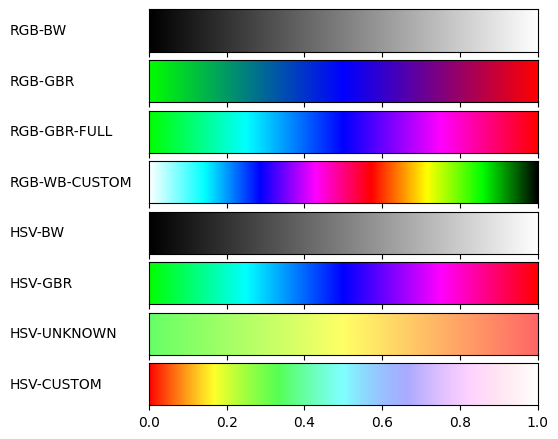

In [236]:
def toname(g):
    return g.__name__.replace('gradient_', '').replace('_', '-').upper()

gradients = (gradient_rgb_bw, gradient_rgb_gbr, gradient_rgb_gbr_full, gradient_rgb_wb_custom,
                 gradient_hsv_bw, gradient_hsv_gbr, gradient_hsv_unknown, gradient_hsv_custom)

plot_color_gradients(gradients, [toname(g) for g in gradients])